# Exercice 0 : échauffement

Dans ce TP nous allons représenter des distributions de données via différents types de graphes.

Q1: Expliquez ce que représente et quand utiliser :


*   un scatterplot
*   un barplot
*   un boxplot
*   un violinplot
*   un histogramme






```markdown
- Scatterplot: Nuage de points -> mettre les datas sous forme de points.
Utilisé pour détecter des trends et relations entre variables mais aussi des outliers.

- Barplot: Diagramme à barres -> représenter les datas par des fréquences ou des variables.
Utilisé pour comparer ces dites fréquences ou valeurs.

- Boxplot: Boîtes à moustache -> afficher les datas à travers leur quartiles.
Utilisé pour appréhender la dispersion de la donnée.

- Violinplot: Tracé de violon -> combinaison d'un boxplot et d'un diagramme de densité.
Utilisé pour comparer les distributions de probabilités.

- Histogramme -> Utilisé pour les données discrètes ou intervals de valeurs.
```

# Exercice 1 : description de la base genbank

La base de données genbank est un des principaux dépots de données de génomes, elle gérée par le NCBI Américain (National Center for Biotechnology Information).

Dans cet exercice, allons étudier le contenu général de cette base de données en utilisant les fichiers de résumés.

---

Note technique : dans colab, vous pouvez monter votre google drive avec le code suivant :

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: Error: credential propagation was unsuccessful

---

Q1. Téléchargez les fichier "overview.txt" et "README" disponibles ici :

 https://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/



Q2. Quel est le format du fichier "overview.txt" ?

```markdown
C'est un tableau
```

Q3. Utilisez le fichier README pour comprendre ce que chaque colonne représente.

```markdown
Organism/Name: Name at the species level
Kingdom: Taxonomic division
Group: Commonly used organism groups
SubGroup: NCBI Taxonomy level
Size: Estimated genome size
Chrs: Number of chromosomes
Organelles: Number of Organelles
Plasmids: Number of plasmids
BioProjects: Number of genome sequencing projects.
```

## Organisation de la base de données

Q4. Combien d’organismes sont présents ?

In [ ]:
with open('/content/overview.txt') as file:
  lines = len(file.readlines())
  print(lines - 1)

87888


### Royaumes

Q5. Qu'est-ce qu'un royaume ?

```markdown
C'est la plus grande catégorie de classification d'un être biologique.
```

Q6. Combien de royaumes sont présents dans la base ?

```markdown
Il y a 4 royaumes: Archae, Bacteria, Eukaryota, Viruses
```

Q7. Affichez le nombre d’organismes pour chaque royaume.

In [ ]:
import pandas as pd

df = pd.read_csv('overview.txt', delimiter='\t', low_memory=False)
df['Size (Mb)'] = pd.to_numeric(df['Size (Mb)'], errors='coerce')
df['Chrs'] = pd.to_numeric(df['Chrs'], errors='coerce')
df['Organelles'] = pd.to_numeric(df['Organelles'], errors='coerce')
df['Plasmids'] = pd.to_numeric(df['Plasmids'], errors='coerce')
df['BioProjects'] = pd.to_numeric(df['BioProjects'], errors='coerce')
df['Kingdom'].value_counts()

,count
Kingdom,
Bacteria,37492
Viruses,32573
Eukaryota,15560
Archaea,2263


### Groupes

Q8. Qu’est-ce qu’un groupe ?

```markdown
Un groupe est une catégorie de classification d'un être biologique. Ils découlent des royaumes.
```

Q9. Combien de groupes sont présents par royaume ?

In [ ]:
df.groupby('Kingdom')['Group'].nunique()

,Group
Kingdom,
Archaea,11
Bacteria,37
Eukaryota,5
Viruses,8


Q10. Affichez pour chaque royaume le nombre d’organismes par groupe.

In [ ]:
df.groupby(['Kingdom', 'Group']).size().unstack(fill_value=0)

Group,Acidobacteriota,Animals,Aquificota,Asgard group,Atribacterota,Bacteria incertae sedis,Bdellovibrionota,Caldisericota/Cryosericota group,Calditrichota,Campylobacterota,...,Thermotogota,delta/epsilon subdivisions,dsRNA viruses,environmental samples,unclassified Archaea,unclassified Bacteria,unclassified archaeal viruses,unclassified phages,unclassified virophages,unclassified viruses
Kingdom,,,,,,,,,,,,,,,,,,,,,
Archaea,0,0,0,61,0,0,0,0,0,0,...,0,0,0,5,57,0,0,0,0,0
Bacteria,256,0,42,0,43,3872,122,21,10,256,...,72,288,0,4,0,346,0,0,0,0
Eukaryota,0,7789,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Viruses,0,0,0,0,0,0,0,0,0,0,...,0,0,30,0,0,0,15,1233,3,684


## Génomes

Q11. Affichez la distribution des tailles de génomes sur toute la base de données, utilisez un boxplot ou un violinplot (avec axe en log pour y voir quelque chose).

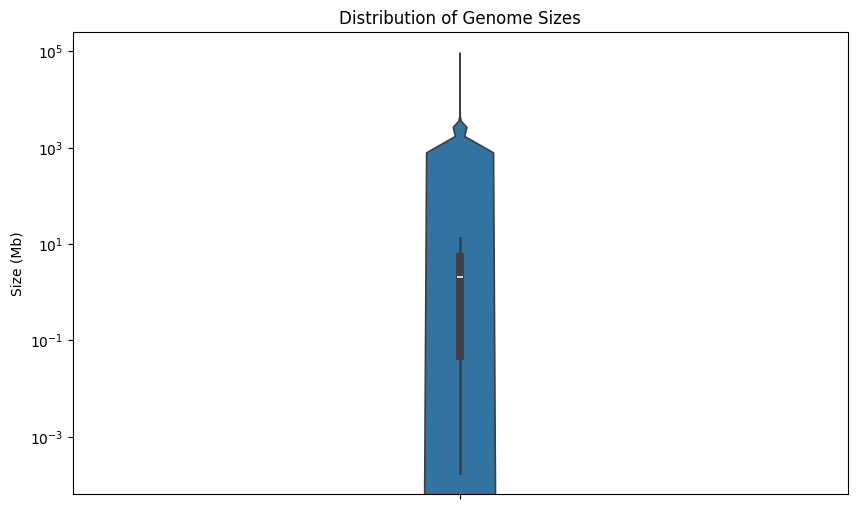

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(y=df['Size (Mb)'])
plt.yscale('log')
plt.ylabel('Size (Mb)')
plt.title('Distribution of Genome Sizes')
plt.show()

Q12. Affichez la distribution par royaume.

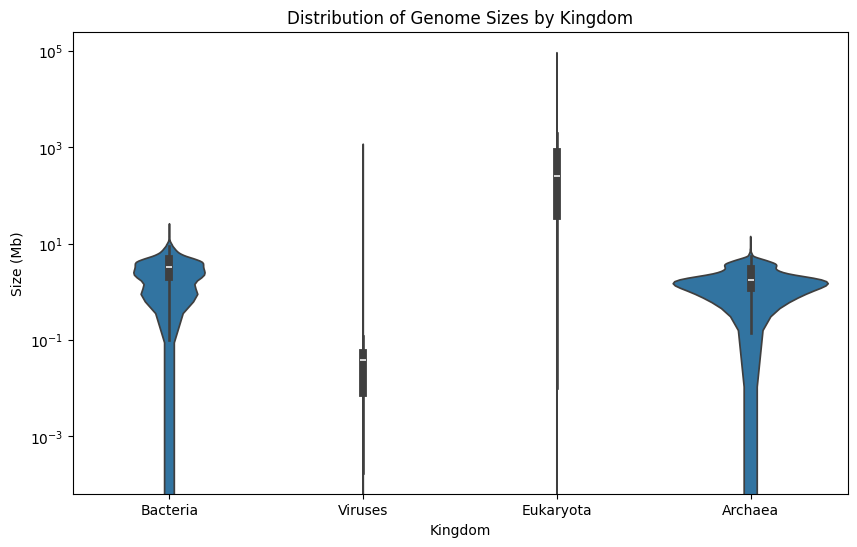

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Kingdom'], y=df['Size (Mb)'])
plt.yscale('log')
plt.ylabel('Size (Mb)')
plt.xlabel('Kingdom')
plt.title('Distribution of Genome Sizes by Kingdom')
plt.show()

Q13. Affichez la distribution par groupe pour chaque royaume.

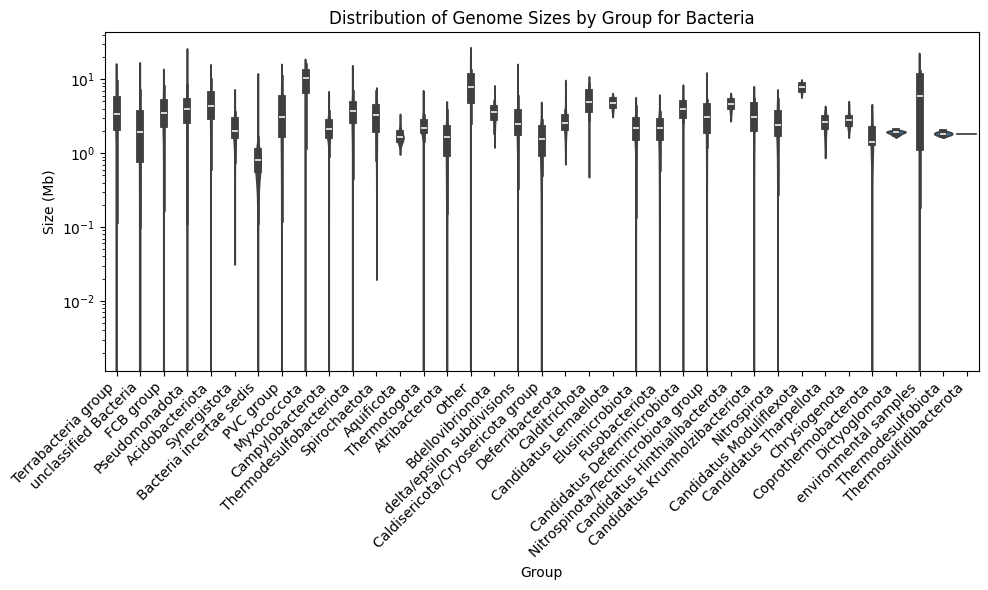

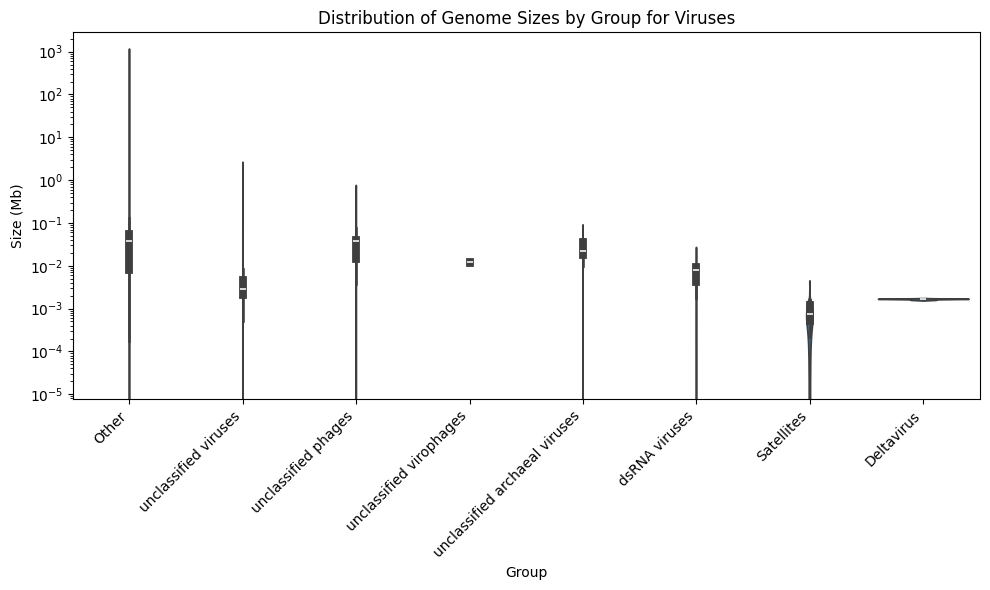

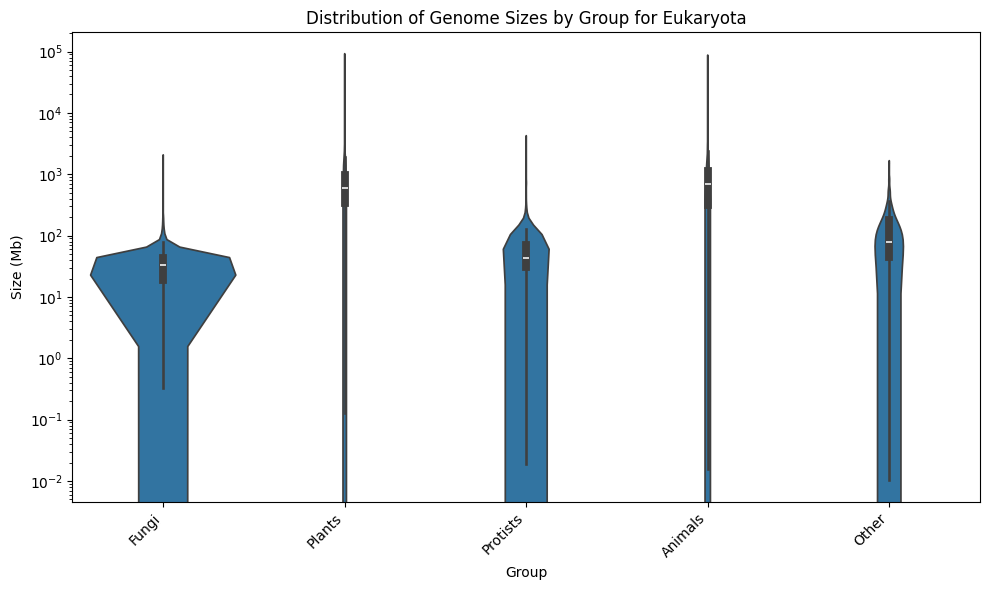

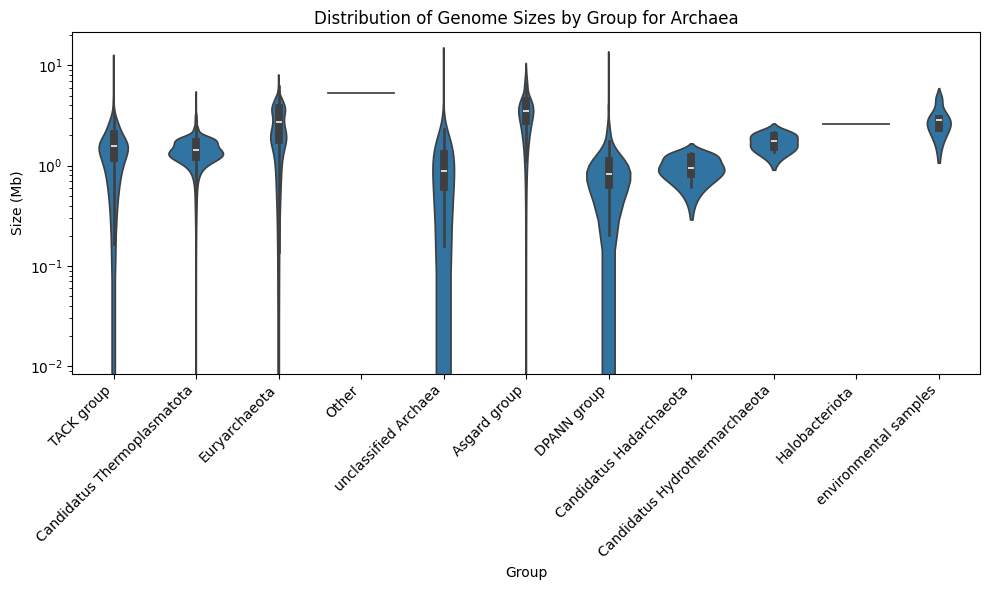

In [ ]:
for kingdom in df['Kingdom'].unique():
  plt.figure(figsize=(10, 6))
  kingdom_data = df[df['Kingdom'] == kingdom]
  sns.violinplot(x='Group', y='Size (Mb)', data=kingdom_data)
  plt.yscale('log')
  plt.ylabel('Size (Mb)')
  plt.xlabel('Group')
  plt.title(f'Distribution of Genome Sizes by Group for {kingdom}')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

Q14. Pour chaque royaume, donnez le nom et la taille de l’organisme avec le plus petit génome.

In [ ]:
kingdom_groups = df.groupby('Kingdom')

for kingdom, kingdom_data in kingdom_groups:
  smallest_genome_organism = kingdom_data.loc[kingdom_data['Size (Mb)'].idxmin()]

  print(f"Kingdom: {kingdom}")
  print(f"Organism with smallest genome: {smallest_genome_organism['#Organism/Name']}")
  print(f"Genome size: {smallest_genome_organism['Size (Mb)']} Mb")
  print("---")


Kingdom: Archaea
Organism with smallest genome: candidate division MSBL1 archaeon SCGC-AAA385M02
Genome size: 0.137797 Mb
---
Kingdom: Bacteria
Organism with smallest genome: bacterium AG-323-L21
Genome size: 0.101587 Mb
---
Kingdom: Eukaryota
Organism with smallest genome: Fragilariopsis kerguelensis
Genome size: 0.010223 Mb
---
Kingdom: Viruses
Organism with smallest genome: Hippotragine gammaherpesvirus 1
Genome size: 0.000174 Mb
---


Q15. Même chose mais pour l'organisme avec le plus grand génome.

In [ ]:
for kingdom, kingdom_data in kingdom_groups:
  smallest_genome_organism = kingdom_data.loc[kingdom_data['Size (Mb)'].idxmax()]

  print(f"Kingdom: {kingdom}")
  print(f"Organism with smallest genome: {smallest_genome_organism['#Organism/Name']}")
  print(f"Genome size: {smallest_genome_organism['Size (Mb)']} Mb")
  print("---")


Kingdom: Archaea
Organism with smallest genome: archaeon
Genome size: 13.3999 Mb
---
Kingdom: Bacteria
Organism with smallest genome: Thiomonas
Genome size: 25.1426 Mb
---
Kingdom: Eukaryota
Organism with smallest genome: Viscum album
Genome size: 91113.7 Mb
---
Kingdom: Viruses
Organism with smallest genome: uncultured virus
Genome size: 1150.68 Mb
---


## Chromosomes

Q16. Affichez la distribution du nombre de chromosomes, sous la forme d’un histogramme, sur toute la base de données.

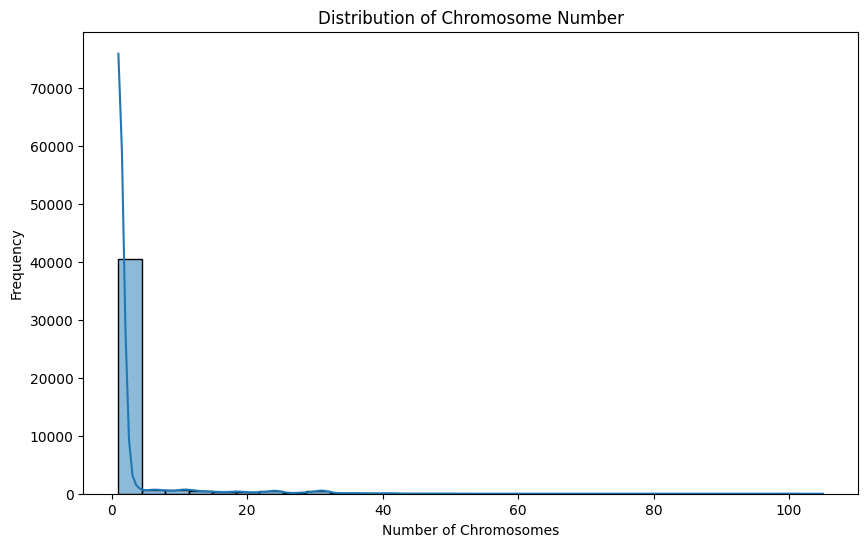

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Chrs'], bins=30, kde=True)
plt.xlabel('Number of Chromosomes')
plt.ylabel('Frequency')
plt.title('Distribution of Chromosome Number')
plt.show()


Q17. Même chose mais pour chaque royaume sous la forme d'un boxplot (ou violinplot).

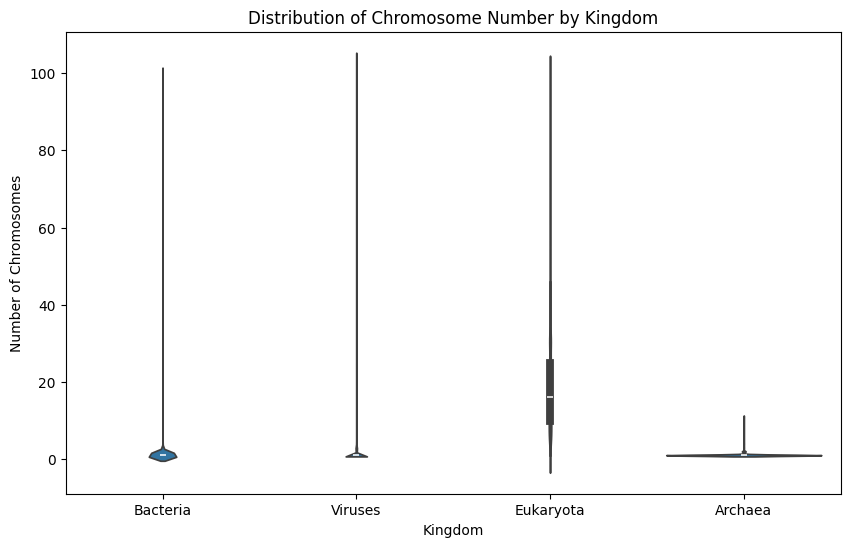

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(x='Kingdom', y='Chrs', data=df)
plt.ylabel('Number of Chromosomes')
plt.xlabel('Kingdom')
plt.title('Distribution of Chromosome Number by Kingdom')
plt.show()


Q18. Qu’observez-vous ? Comment l’expliquez-vous ?

```markdown
On observe que le nombre de chromosomes à travers les espèces reste globalement le même.
On peut en déduire que pour qu'un être vive, il est nécessaire que son
nombre de chromosome soit similaire à celui de ses ancêtres.
```

Q19. Pour les Eucaryotes uniquement, affichez la distribution du nombre de chromosomes sous la forme d’un histogramme.

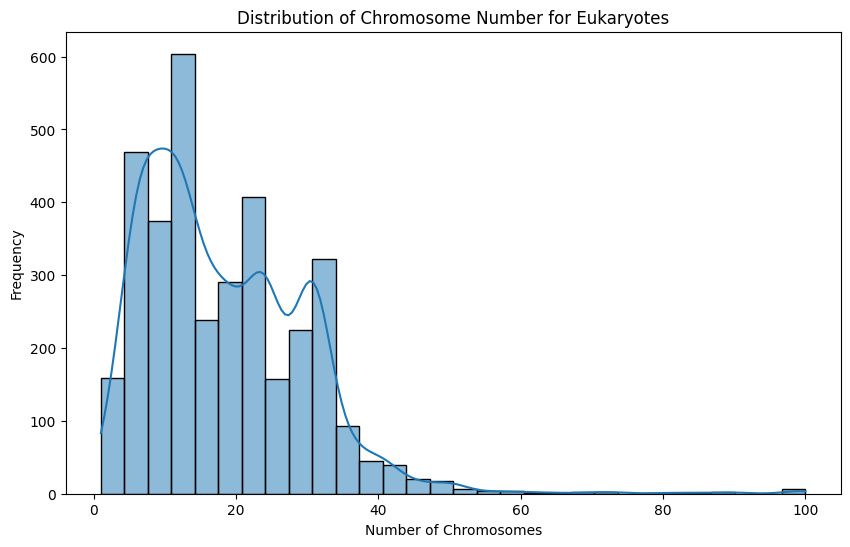

In [ ]:
import matplotlib.pyplot as plt
eukaryotes_df = df[df['Kingdom'] == 'Eukaryota']

plt.figure(figsize=(10, 6))
sns.histplot(eukaryotes_df['Chrs'], bins=30, kde=True)
plt.xlabel('Number of Chromosomes')
plt.ylabel('Frequency')
plt.title('Distribution of Chromosome Number for Eukaryotes')
plt.show()


Q20. Pour les Eucaryotes uniquement, affichez la taille des génomes en fonction du nombre de chromosomes, sous forme d'un graphe (scatter plot).

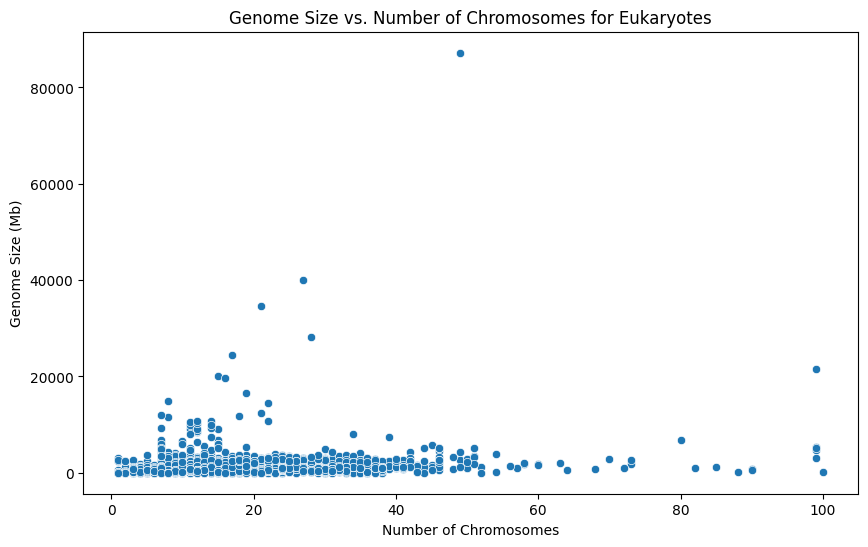

In [ ]:
import matplotlib.pyplot as plt
eukaryotes_df = df[df['Kingdom'] == 'Eukaryota']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Chrs', y='Size (Mb)', data=eukaryotes_df)
plt.xlabel('Number of Chromosomes')
plt.ylabel('Genome Size (Mb)')
plt.title('Genome Size vs. Number of Chromosomes for Eukaryotes')
plt.show()


Q21. Qu’observez-vous ?

```markdown
The number of chromosomes in the body is not related to the size of its genome
```

## Plasmides

Q22. Qu'est-ce qu'un plasmide ?

```markdown
Un plasmide est une petite molécule d'ADN circulaire distincte de l'ADN chromosomique,
 possédant la capacité unique de se répliquer indépendamment
```

Q23. Affichez le nombre moyen de plasmides par royaume, sous forme d'un barplot.

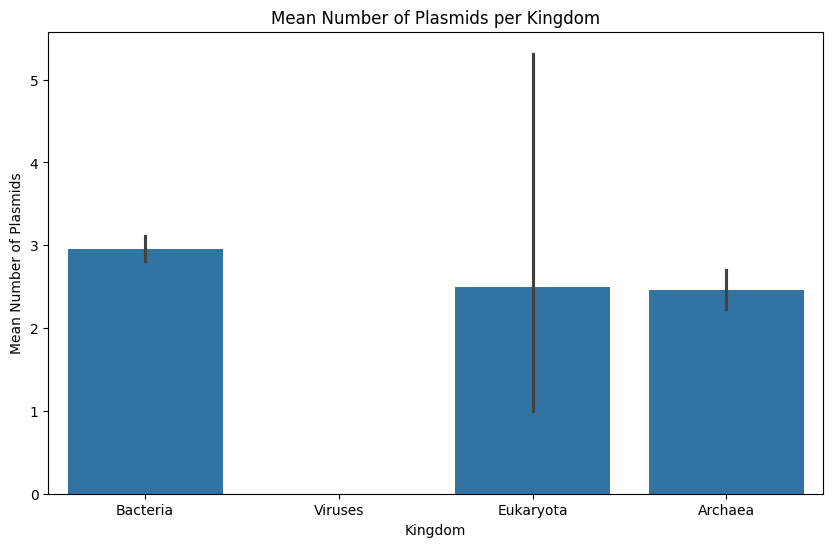

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Kingdom', y='Plasmids', data=df, estimator=lambda x: x.mean())
plt.ylabel('Mean Number of Plasmids')
plt.xlabel('Kingdom')
plt.title('Mean Number of Plasmids per Kingdom')
plt.show()

Q24. Qu'observez-vous ?

```markdown
Les virus n'ont aucun plasmides.
```

## Projets

Q25. Qu'est-ce qu'un projet ?

```markdown
C'est une étude faite sur les espèces en question.
```

Q26. Affichez le nombre de projets moyen par organisme pour chaque royaume, sous forme d'un barplot.

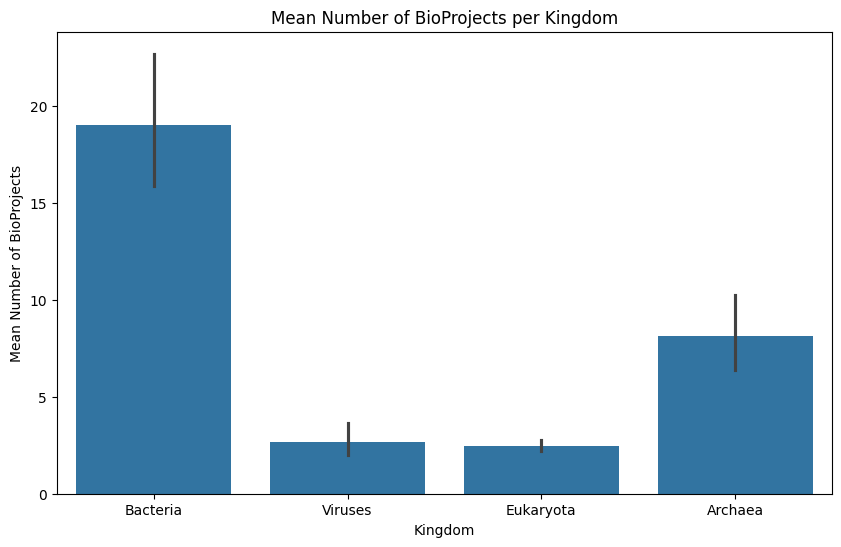

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x='Kingdom', y='BioProjects', data=df, estimator=lambda x: x.mean())
plt.ylabel('Mean Number of BioProjects')
plt.xlabel('Kingdom')
plt.title('Mean Number of BioProjects per Kingdom')
plt.show()

Q27. Combien d'organismes ont 0 projets ?

In [ ]:
zero_projects = df[df['BioProjects'] == 0]
print(len(zero_projects))

0


Q28. Combien d'organismes ont > 1 projets ?



In [ ]:
more_than_one_project = df[df['BioProjects'] > 1]
print(len(more_than_one_project))

18947


Q29. Affichez le nom et nombre du TOP 5 des organismes possédant le plus de projets.

In [ ]:
top_organisms = df.sort_values('BioProjects', ascending=False).head(5)

print(top_organisms[['#Organism/Name', 'BioProjects']])

                             #Organism/Name  BioProjects
29710                      Escherichia coli      39907.0
41700                 Klebsiella pneumoniae      21229.0
75957                 Staphylococcus aureus      17228.0
70775                   Salmonella enterica      16613.0
83689  uncultured Lachnospiraceae bacterium      15909.0


Q30. Expliquez rapidement pourquoi ces organismes sont les plus étudiés.

```markdown
Car ce sont les maladies les plus répandues, donc énormément d'études ont étés effectuées.
```

# Exercice 3 : Gènes

Pour obtenir des informations plus précises sur les gènes contenus dans les différents organismes de genbank, nous allons travailler avec le fichier de résumé d'assemblage.

Q1. Récupérez le fichier "assembly_summary_genbank_historical.txt" situé ici:
https://ftp.ncbi.nlm.nih.gov/genomes/ASSEMBLY_REPORTS/

(On utilise le fichier historique car il est plus petit, l’autre fichier fait >1GB)

Q2. Qu'est-ce que le GC content ? Pourquoi est-il mesuré?

```markdown
C'est le pourcentage de nucléotides G et C dans l'ADN.
Il est mesuré car cela défini la stabilité de l'ADN et de sa structure.
```

Q3. Affichez la distribution du GC content dans tous les organismes de la liste, sous forme d'un violinplot.

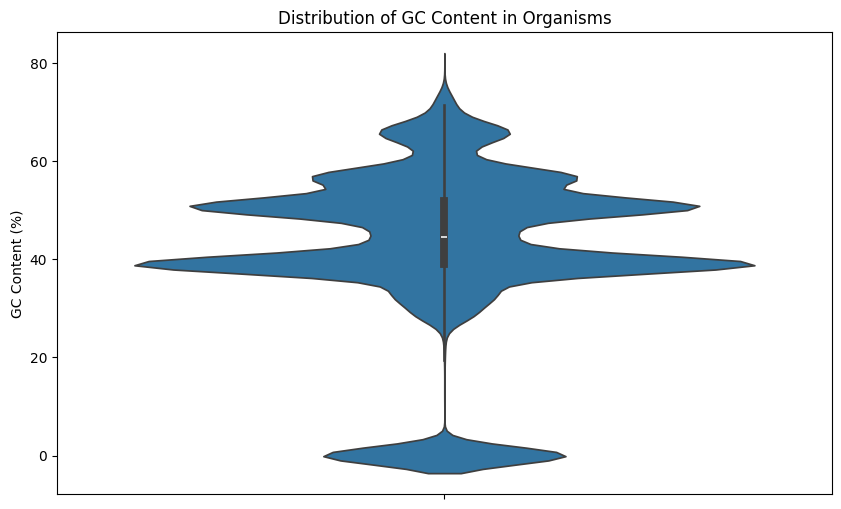

In [ ]:
df2 = pd.read_csv('assembly_summary_genbank_historical.txt', delimiter='\t', header=0, skiprows=1, low_memory=False)
df2['total_gene_count'] = pd.to_numeric(df2['total_gene_count'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.violinplot(y=df2['gc_percent'])
plt.ylabel('GC Content (%)')
plt.title('Distribution of GC Content in Organisms')
plt.show()

Q4. Qu'observez-vous ?

```markdown
Votre réponse ici.
```

Q5. Affichez le GC content en fonction de la taille du génome, sous forme de scatter plot.

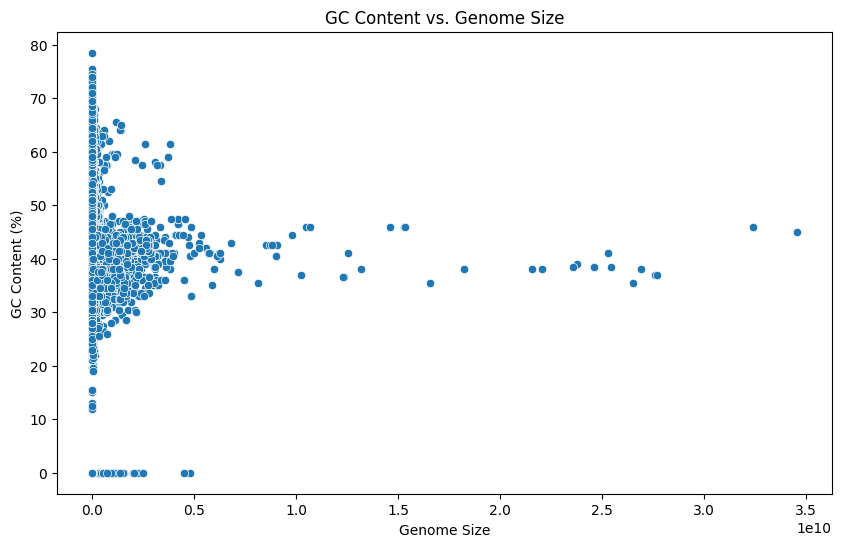

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='genome_size', y='gc_percent', data=df2)
plt.xlabel('Genome Size')
plt.ylabel('GC Content (%)')
plt.title('GC Content vs. Genome Size')
plt.show()

Q6. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q7. Affichez la distribution du nombre de gènes, choisissez le plot.

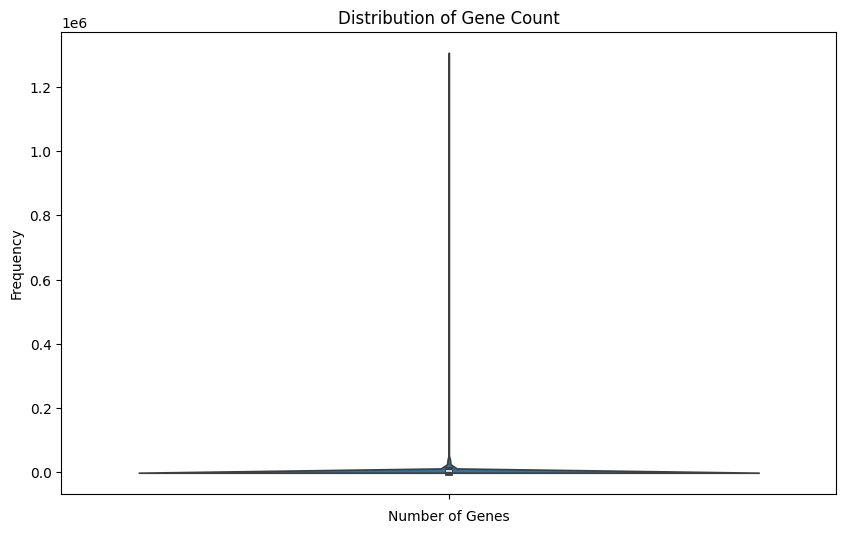

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(y=df2['total_gene_count'])
plt.xlabel('Number of Genes')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Count')
plt.show()


Q8. Qu'observez-vous ?

```markdown
Votre réponse ici
```

Q9. Enlevez les données aberrantes (outliers)

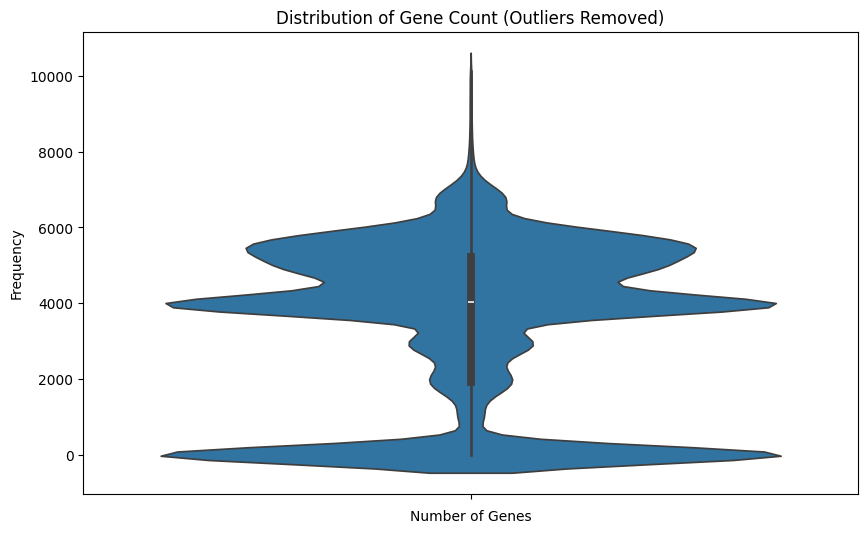

In [ ]:
import matplotlib.pyplot as plt
Q1 = df2['total_gene_count'].quantile(0.25)
Q3 = df2['total_gene_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2_filtered = df2[~((df2['total_gene_count'] < lower_bound) | (df2['total_gene_count'] > upper_bound))]


plt.figure(figsize=(10, 6))
sns.violinplot(y=df2_filtered['total_gene_count'])
plt.xlabel('Number of Genes')
plt.ylabel('Frequency')
plt.title('Distribution of Gene Count (Outliers Removed)')
plt.show()


Q10. Comment avez-vous fait ? Quel seuil avez-vous choisi ?

```markdown
J'ai utilisé la méthode de l'écart interquartile pour identifier et supprimer les
valeurs aberrantes de la colonne.

Le seuil choisi est donc le lower and higher bound de la méthode.
```

Q11. Y-a-t-il une corrélation entre taille du génome et nombre de gènes ?

The correlation between genome size and gene count is: -0.15679470389288216


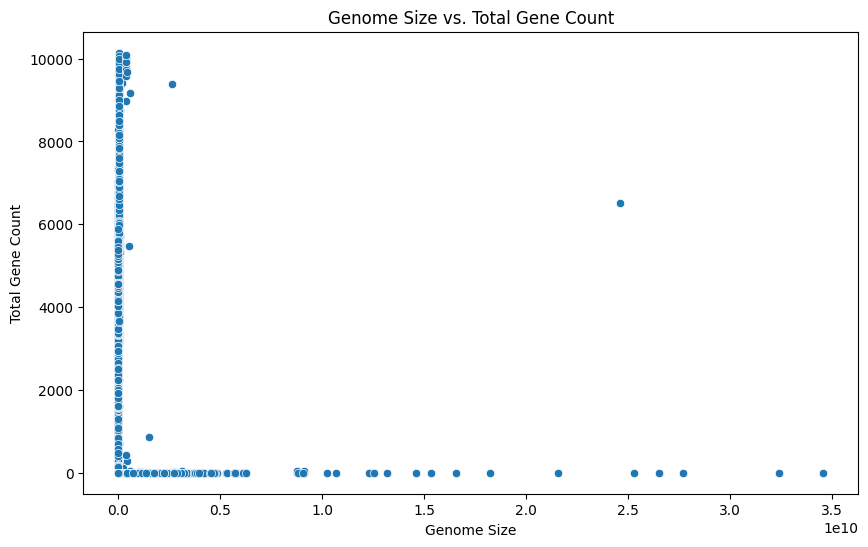

In [ ]:
import matplotlib.pyplot as plt
correlation = df2_filtered['genome_size'].corr(df2_filtered['total_gene_count'])

print(f"The correlation between genome size and gene count is: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='genome_size', y='total_gene_count', data=df2_filtered)
plt.xlabel('Genome Size')
plt.ylabel('Total Gene Count')
plt.title('Genome Size vs. Total Gene Count')
plt.show()


# Exercice 4: GC-content

Pour une séquence $s$, le contenu en GC est défini par :

$GC(s)=\frac{\#G(s) + \#C(s)}{|s|}$,

où $\#N(s)$ est le nombre de nucléotides $N$ dans la séquence $s$ et $|s|$ est la taille de $s$.

Q1. Récuperrez legénome de l’organisme *Acidianus ambivalens* à partir du FTP :

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/archaea/

(dans latest_assembly_versions/GCA_009729015.1_ASM972901v1, le fichier avec l'extension "fna.gz")


Q2. Affichez le GC content global.

In [ ]:
#Votre code ici

Q3. Pour détecter des variations locales de GC, on va utiliser une fenêtre glissante de taille N nucléotides (démarrer à la position N/2 et finir à |s| -N/2).

Affichez le GC content le long du génome pour des fenêtres de tailles 50, 1000 ou 10000.

In [ ]:
#Votre code ici

Q4. Qu’observez-vous ?

```markdown
Votre réponse ici
```

Q5. On va lisser le signal pour le rendre moins bruité en utilisant la fonction *savgol_filter* de *scipy.signal* avec les paramètres $51$ et $5$.

In [ ]:
#Votre code ici

Q6. Finalement, on va rendre le code générique pour n'importe quel espèce. Modifier votre code pour qu'il prenne en entrée un nom de fichier de génome du ftp, et une taille de fenêtre, et affiche le GC content global et local.

In [ ]:
#Votre code ici